In [ ]:
!wget 'http://nlp.stanford.edu/data/glove.6B.zip'

--2022-07-01 17:44:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-07-01 17:44:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-07-01 17:44:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip 'glove.6B.zip'
!ls
!pwd

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip    sample_data
glove.6B.200d.txt  glove.6B.50d.txt   glove.6B.zip.1
/content


In [ ]:
import re
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download()
from nltk.corpus import stopwords as stop

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
text ="The Indian economy faced several domestic and external headwinds for most part of the year under review due to protectionist trade policies, geopolitical uncertainties and slowdown in major trading partners. Weakness in the auto sector, lingering issues in the NBFC sector, and a moderation in private sector investments contributed to the slowdown. Although growth moderated to 4.2 per cent in FY 2019-20 from 6.1 per cent in FY 2018-19, India became the fifth largest economy in the world, surpassing the UK and France.India’s external sector continued to gain stability as the current account deficit (balance of exports minus imports) declined to 0.2 per cent of GDP in the third quarter of FY 2019-20. This was driven by lower crude oil prices for most part of the year, reducing India’s import bill (imports 80 per cent of total oil demand). Foreign direct investment (FDI) and portfolio flows remained strong, rising to over US$ 32 billion and US$ 15 billion in April-December 2019, respectively.Domestic demand also began to show green shoots in the second half of the year, especially in the rural sector. Better food price realisations and government measures focusing on doubling farm income, such as increase in Minimum Support Prices (MSPs), supported rural demand. Government consumption expenditure remained the support lever in growth dynamics. As per the Central Statistical Organisation government consumption expenditure grew at 11.9 per cent in FY 2019-20 vis-à-vis 10.2 per cent in FY 2018-19.However, the outbreak of the coronavirus pandemic has clouded the growth outlook. The nationwide lockdown is likely to hit consumption of non-essential items and weigh on activity in the services (particularly in tourism, aviation, and hospitality) as well as the manufacturing sector. Moreover, lower global growth is likely to have a bearing on export demand. The World Bank expects the overall global economy to contract by 5.2 percent due to the coronavirus impact, significantly affecting the US, Eurozone and UK economies.In the financial sector, credit growth moderated to 6.8 per cent in May 2020 from 13.5 per cent a year ago. The weakness was recorded in agriculture and services while credit deployment to industrial sector improved at the margin. The NPA ratio improved from its peak of 11.2 per cent in the year ended March 31, 2018 to 9.3 per cent in the year ended March 31, 2019, though the pace of improvement has slowed down in recent quarters. As per the RBI’s December 2019 Financial Stability Report,Gross Non-Performing Assets (GNPA) ratio of scheduled commercial banks remained unchanged at 9.3 per cent between March 2019 and September 2019. That said, the Central Bank estimates the ratio to deteriorate to 9.9 per cent by September 2020. The current COVID-19 related slowdown could add further stress in the system.The Government and the RBI have announced a host of measures to cushion the direct impact of the lockdown on the economy. The stimulus package (` 20 Lakh crore) announced by the GOI in five tranches had a clear focus on the MSME sector, a key provider of employment in both the organized and unorganized segments and a critical component of the domestic industrial supply chain. The MSME sector that encompasses a wide range of industries had been under considerable stress for a prolonged period before the incidence of COVID. This made them particularly vulnerable to the lockdown and its aftermath. The NBFC sector, a major provider of funding to the MSMEs had also been going through a period of stress particularly in its access to finances both from banks and the market. Thus, the stimulus package focuses on the survival of both MSMEs and NBFCs through the COVID crisis and also their revival. The critical element of the stimulus is its attempt to facilitate the flow of credit to both MSMES directly and to NBFCS. The government aims to do this by reducing the risk taken by banks and other institutions in lending to them by providing explicit guarantees either on the entire loan or a fraction. The guarantees delivered are through Special Purpose Vehicles (SPVs) in which the government has initially taken an equity stake. Thus, for instance the targeted credit flow of ` 300 billion in the form of collateral free loans to the smaller MSMEs is backed by a 100 per cent GOI guarantee given through NCGTC. Other measures include creating a fund of funds for MSMEs, partial credit guarantee scheme for NBFCs/MFIs and providing subordinate debt for stressed MSMEs through a Credit Guarantee Fund Trust.There are non-financial measures as well that aims to benefit MSMEs. The upward revision of turnover and investment limit (Micro: turnover increased to ` 5 crore, investment increased to ` 1 crore; Small: Turnover increased to ` 50 crore and investment increased to ` 10 crore; Medium: Turnover increased to ` 250 crore and investment increased to ` 50 crore) would help MSMEs expand operations considerably without fear of losing some of the fiscal and other benefits that the segment enjoys.The direct fiscal spending component (on MNREGA, EPF support for business and workers, food grain supply for migrant workers and enhancing Micro food enterprises among other things) is relatively low and stands at ` 2 trillion or 1 per cent of GDP. Instead the broad strategy of the stimulus is to remove bottlenecks on the supply side for the smaller and labour intensive firms to set off a “virtuous cycle” of more viable operations, increased production and employment and higher incomes that would translate into enhanced demand.On the monetary policy side, the RBI has taken a number of steps to provide liquidity and enhance credit flow in the system. The RBI recently delivered an off-cycle rate cut of 40 bps, taking the repo rate to 4.0 per cent and lowered the reverse repo rate by 40 bps to 3.35 per cent. The RBI has delivered a total rate cut (repo) of 115 bps since February 2020. The RBI has also taken a slew of measures to address liquidity constraints such as the announcement of the moratorium, liquidity infusion through TLTRO (Targeted Long Term Repo Operations) for NBFCs (` 50,000 crore), liquidity facility ` 50,000 crore for mutual funds and a cut in the CRR (Cash Reserve Ratio) by 100 bps to 3%. We expect the Central Bank to deliver further rate cuts and keep liquidity in surplus in the coming months, bringing down the cost of borrowing and pushing credit growth in the system.CPI inflation remained in a comfortable zone in H1 FY 2019-20. However, inflation rose from October 2019 onwards, peaking in January 2020 (to 7.6 per cent) mainly due to rise in food prices on account of higher onion prices. In FY 2020-21, we (HDFC Bank) expect the headline inflation to ease gradually on lower food prices, drop in crude oil prices and dwindling demand conditions due to the lockdown. For the year ending March 31, 2021, we expect the headline inflation at 3.7 per cent, well within the RBI’s target range of 4 +/-2 per cent. Thus, with inflation expected to be below the RBI’s median target of 4 per cent, the Central Bank could deliver further rate cuts to support growth.Overall, we expect the growth to remain subdued in the first half of FY 2020-21, with growth contracting in the first and second quarters and a gradual recovery in the second half supported by fiscal and monetary policy stimulus.The financial performance of your Bank during the year ended March 31, 2020, remained healthy with Total Net Revenue (Net Interest Income Plus Other Income) rising 20.6 per cent to ` 79,447.1 crore from ` 65,869.1 crore in the previous year. Revenue growth was driven by an increase in both Net Interest Income and Other Income. Net Interest Income grew by 16.5 per cent to ` 56,186.3 crore due to acceleration in loan growth coupled with a Net Interest Margin (NIM) of 4.3 percent.Other Income grew by 32.0 per cent to ` 23,260.8 crore. The largest component was Fees and Commissions, which increased by 18.5 per cent to ` 16,333.7 crore. Foreign Exchange and Derivatives Revenue was ` 2,154.8 crore, gain on revaluation and sale of investments was ` 1,934.4 crore, and recoveries from written-off accounts were ` 2,253.5 crore. Following the outbreak of the coronavirus pandemic in March 2020, the central government imposed a nationwide lockdown from March 24 to break the chain of transmission. Economic activities slowed down considerably. As a result, your Bank witnessed an impact on business volumes in terms of loan originations, distribution of third party products, and payments product activities, as well as on collections. Due to these pressures, fees/other income was lower by ` 450 crore during the year.Operating (Non-Interest) Expenses rose to ` 30,697.5 crore from ` 26,119.4 crore. During the year, your Bank set up 313 new Banking Outlets and 1,412 ATMs / Cash Deposit and Withdrawal Machines (CDMs). This, along with strong growth in retail asset and card products, resulted in higher infrastructure and staffing expenses. Staff expenses also went up due to employee additions and annual wage revisions. Despite higher infrastructure expenses, the Cost to Income Ratio improved to 38.6 per cent from 39.7 per cent.Total Provisions and Contingencies were ` 12,142.4 crore as compared to ` 7,550.1 crore the preceding year. Your Bank’s provisioning policies remain more stringent than regulatory requirements. Total provisions for the fourth quarter of the financial year included credit reserves relating to the coronavirus pandemic in the form of contingent provisions of approximately ` 1,550.0 crore.The Coverage Ratio based on specific provisions alone excluding write-offs was 72 per cent; including General and Floating provisions, it was 118 per cent. Your Bank made General Provisions of ` 796.0 crore during the year. Gross Non-Performing Assets (GNPA) were at 1.26 per cent of Gross Advances, as against 1.36 per cent in the preceding year. Net NPA ratio stood at 0.36 per cent as against 0.39 per cent in the previous year.In accordance with the RBI guidelines related to the COVID-19 Regulatory Package announced on March 27, 2020 and April 17, your Bank granted a moratorium of three months on the payment of all instalments and/or interest, as applicable, falling due between March 1, 2020 and May 31, 2020 to all eligible borrowers classified as Standard, even if overdue, as on February 29, 2020. For all such accounts where the moratorium is granted, the asset classification shall remain unchanged during the moratorium period. The Bank has made provisions above the RBI prescribed requirements against the potential impact of the coronavirus pandemic (based on the information available at this point in time).Profit Before Tax grew by 13.7 per cent to ` 36,607.1 crore. After providing for Income Tax of ` 10,349.8 crore, Net Profit increased by 24.6 per cent to ` 26,257.3 crore from ` 21,078.1 crore. Return on Average Net Worth was 16.76 per cent while Basic Earnings Per Share was ` 48.01 up from ` 39.33.As on March 31, 2020, your Bank’s Total Balance Sheet stood at ` 1,530,511 crore, an increase of 23.0 per cent over ` 1,244,541 crore on March 31, 2019. Total Deposits rose by 24.3 per cent to ` 1,147,502 crore from ` 923,141 crore.Savings Account Deposits grew by 24.8 per cent to ` 310,377 crore while Current Account Deposits rose by 22.3 per cent to ` 174,248 crore. Time Deposits stood at ` 662,877 crore, representing an increase of 24.6 per cent. CASA Deposits accounted for 42.2 per cent of Total Deposits. Advances stood at ` 993,703 crore, an increase of 21.3 per cent. Domestic loan portfolio of ` 974,161 crore grew by 21.4 per cent over March 31, 2019. Your Bank had a share of approximately 8.2 per cent in Total Domestic Deposits and 9.3 per cent in Total Domestic Advances."

In [ ]:
count=0
for i in text:
  count+=1 
print(count)

11828


In [ ]:

print(text)
import nltk
nltk.download('punkt')

tokenised_words = nltk.word_tokenize(text)
print(tokenised_words)

The Indian economy faced several domestic and external headwinds for most part of the year under review due to protectionist trade policies, geopolitical uncertainties and slowdown in major trading partners. Weakness in the auto sector, lingering issues in the NBFC sector, and a moderation in private sector investments contributed to the slowdown. Although growth moderated to 4.2 per cent in FY 2019-20 from 6.1 per cent in FY 2018-19, India became the fifth largest economy in the world, surpassing the UK and France.India’s external sector continued to gain stability as the current account deficit (balance of exports minus imports) declined to 0.2 per cent of GDP in the third quarter of FY 2019-20. This was driven by lower crude oil prices for most part of the year, reducing India’s import bill (imports 80 per cent of total oil demand). Foreign direct investment (FDI) and portfolio flows remained strong, rising to over US$ 32 billion and US$ 15 billion in April-December 2019, respective

In [ ]:
from typing import Text

# Text cleaning

# Removing stop words

count =0
for i in tokenised_words:
    if i in stopwords.words('english'):
        tokenised_words.remove(i)
        count+=1

print(tokenised_words)
print(count)



['The', 'Indian', 'economy', 'faced', 'several', 'domestic', 'external', 'headwinds', 'most', 'part', 'year', 'review', 'due', 'protectionist', 'trade', 'policies', ',', 'geopolitical', 'uncertainties', 'slowdown', 'major', 'trading', 'partners', '.', 'Weakness', 'auto', 'sector', ',', 'lingering', 'issues', 'NBFC', 'sector', ',', 'moderation', 'private', 'sector', 'investments', 'contributed', 'slowdown', '.', 'Although', 'growth', 'moderated', '4.2', 'per', 'cent', 'FY', '2019-20', '6.1', 'per', 'cent', 'FY', '2018-19', ',', 'India', 'became', 'fifth', 'largest', 'economy', 'world', ',', 'surpassing', 'UK', 'France.India', '’', 'external', 'sector', 'continued', 'gain', 'stability', 'current', 'account', 'deficit', '(', 'balance', 'exports', 'minus', 'imports', ')', 'declined', '0.2', 'per', 'cent', 'GDP', 'third', 'quarter', 'FY', '2019-20', '.', 'This', 'driven', 'lower', 'crude', 'oil', 'prices', 'most', 'part', 'year', ',', 'reducing', 'India', '’', 'import', 'bill', '(', 'import

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
text = TreebankWordDetokenizer().detokenize(tokenised_words)

print(text)
count=0
for i in text:
  count+=1 
print(count)

!pwd
!ls


The Indian economy faced several domestic external headwinds most part year review due protectionist trade policies, geopolitical uncertainties slowdown major trading partners . Weakness auto sector, lingering issues NBFC sector, moderation private sector investments contributed slowdown . Although growth moderated 4.2 per cent FY 2019-20 6.1 per cent FY 2018-19, India became fifth largest economy world, surpassing UK France.India ’ external sector continued gain stability current account deficit (balance exports minus imports) declined 0.2 per cent GDP third quarter FY 2019-20 . This driven lower crude oil prices most part year, reducing India ’ import bill (imports 80 per cent total oil demand). Foreign direct investment (FDI) portfolio flows remained strong, rising US $32 billion US $15 billion April-December 2019, respectively.Domestic demand also began show green shoots second half year, especially rural sector . Better food price realisations government measures focusing doubling

In [ ]:
word_embeddings = {}
f=open("glove.6B.300d.txt", encoding='utf-8')
for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = coefs
f.close()

In [ ]:
print("Vocab Size = ",len(word_embeddings))
print(len(word_embeddings['strange']))
#300 dimentions of the word

Vocab Size =  400000
300


In [ ]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text)
print(sentences)

['The Indian economy faced several domestic external headwinds most part year review due protectionist trade policies, geopolitical uncertainties slowdown major trading partners .', 'Weakness auto sector, lingering issues NBFC sector, moderation private sector investments contributed slowdown .', 'Although growth moderated 4.2 per cent FY 2019-20 6.1 per cent FY 2018-19, India became fifth largest economy world, surpassing UK France.India ’ external sector continued gain stability current account deficit (balance exports minus imports) declined 0.2 per cent GDP third quarter FY 2019-20 .', 'This driven lower crude oil prices most part year, reducing India ’ import bill (imports 80 per cent total oil demand).', 'Foreign direct investment (FDI) portfolio flows remained strong, rising US $32 billion US $15 billion April-December 2019, respectively.Domestic demand also began show green shoots second half year, especially rural sector .', 'Better food price realisations government measures 

In [ ]:
dim=300
sentence_vectors = []
for i in sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((dim,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((dim,))
    sentence_vectors.append(v)
    print(sentence_vectors)

Streaming output truncated to the last 5000 lines.
       -4.42663276e-02, -6.95505443e-03,  6.57724736e-02,  8.17201768e-02,
       -9.17696757e-02,  1.34777272e-01, -5.82314798e-02,  3.31448496e-02,
       -2.56966108e-02,  1.23519482e-01, -1.20503681e-01,  9.67548748e-02,
        3.49131375e-02, -4.09394699e-02, -3.91550281e-01,  6.56815543e-03,
        1.10273119e-01,  1.30409221e-01,  3.99141710e-02, -3.67778714e-02,
       -1.42267288e-01, -1.10063332e-01,  7.85989187e-02,  6.69640685e-02,
       -4.74756509e-02, -2.77392304e-02, -6.25320795e-02,  1.87529114e-01,
       -6.66438866e-02, -6.58664717e-02, -4.60195149e-03, -2.49474956e-03,
        1.09125162e-01, -4.93167561e-02, -2.87222462e-02,  6.06536818e-02,
       -2.64700098e-02,  2.11997935e-01,  9.20345733e-03, -2.97556406e-02,
        6.24512830e-02, -2.38012305e-02,  9.61476478e-03, -9.68989034e-02,
       -2.05482496e-02,  8.22979232e-02,  1.37518916e-02, -6.15309125e-02,
        4.77502398e-02,  7.45937137e-02, -1.29695

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
        6.43550549e-03, -1.07958369e-02, -1.50812316e-02,  6.94006376e-03,
       -8.50011940e-06,  2.26473162e-02, -1.43744480e-02, -4.07234740e-03,
       -8.67496039e-02,  1.80679966e-02, -4.62878593e-03,  7.41902722e-02,
       -1.19211808e-01,  7.40797595e-02, -4.39879438e-02, -2.79950585e-02,
        2.40474100e-02,  1.05770828e-02,  1.59165874e-01, -1.32603953e-02,
        2.25304374e-02, -9.69948670e-03,  5.96013132e-02,  1.42005770e-02,
       -5.45656143e-02, -2.66124924e-02, -7.06417839e-02, -3.42680551e-02,
        2.17793657e-02,  2.83914471e-02, -5.47313684e-02, -9.95176781e-03,
        4.30041189e-02,  5.79124747e-02,  7.39438860e-02,  6.76495495e-02,
        2.04512679e-02,  9.24363227e-03,  3.99386503e-02, -1.04176244e-03,
       -3.25957283e-02,  1.22013942e-01, -1.97131345e-02, -3.38454217e-02,
        4.64049781e-02, -2.06346694e-02, -6.35990824e-02,  3.72048710e-02,
        2.73759771e-02,  6.87505447e-02,  6.48293

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[0.    0.807 0.673 ... 0.54  0.549 0.442]
 [0.807 0.    0.677 ... 0.53  0.564 0.451]
 [0.673 0.677 0.    ... 0.829 0.823 0.867]
 ...
 [0.54  0.53  0.829 ... 0.    0.859 0.865]
 [0.549 0.564 0.823 ... 0.859 0.    0.839]
 [0.442 0.451 0.867 ... 0.865 0.839 0.   ]]


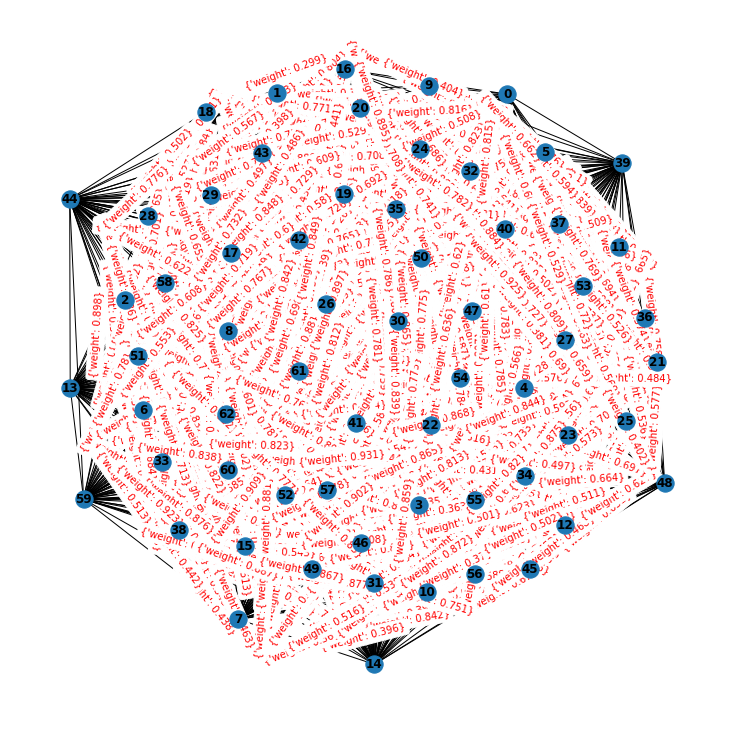

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
sim_mat = np.zeros([len(sentences), len(sentences)])
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,dim),sentence_vectors[j].reshape(1,dim))[0,0]
sim_mat = np.round(sim_mat,3)
print(sim_mat)
 
# Creating the network graph
nx_graph = nx.from_numpy_array(sim_mat)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
plt.show()

In [ ]:
scores = nx.pagerank(nx_graph)
print(scores)

{0: 0.015271974216122338, 1: 0.01460937315854053, 2: 0.01693093292518781, 3: 0.01645216396864462, 4: 0.017160725477509242, 5: 0.016141884403482958, 6: 0.015352214245683058, 7: 0.015224820585608591, 8: 0.015740822246978627, 9: 0.016315006803214245, 10: 0.016979869062575224, 11: 0.01607253640858631, 12: 0.01695805672963413, 13: 0.014650392417290247, 14: 0.014624181169251039, 15: 0.01590758885797754, 16: 0.01622891935450193, 17: 0.014622482662313223, 18: 0.014422459331996484, 19: 0.016629636685037773, 20: 0.01529008278355889, 21: 0.01590648424418494, 22: 0.016058345729238095, 23: 0.015588394942859898, 24: 0.017312139834622944, 25: 0.015480778664891169, 26: 0.01787745808459635, 27: 0.016918999288900886, 28: 0.015742422801874788, 29: 0.016096880084974122, 30: 0.016652414394577965, 31: 0.017146299480354323, 32: 0.0160766868138964, 33: 0.016084283488184685, 34: 0.017595738729588417, 35: 0.01795532501856039, 36: 0.01648776884759024, 37: 0.016000805616959754, 38: 0.016553213451350003, 39: 0.014

In [ ]:
count=0
ranked_sentences = sorted(((scores[i],i) for i,s in enumerate(sentences)), reverse=True)
arranged_sentences = sorted(ranked_sentences[0:int(len(sentences)*0.5)], key=lambda x:x[1])
print("\n".join([sentences[x[1]] for x in arranged_sentences]))

Although growth moderated 4.2 per cent FY 2019-20 6.1 per cent FY 2018-19, India became fifth largest economy world, surpassing UK France.India ’ external sector continued gain stability current account deficit (balance exports minus imports) declined 0.2 per cent GDP third quarter FY 2019-20 .
This driven lower crude oil prices most part year, reducing India ’ import bill (imports 80 per cent total oil demand).
Foreign direct investment (FDI) portfolio flows remained strong, rising US $32 billion US $15 billion April-December 2019, respectively.Domestic demand also began show green shoots second half year, especially rural sector .
Better food price realisations government measures focusing doubling farm income, increase Minimum Support Prices (MSPs), supported rural demand .
Moreover, lower global growth likely bearing export demand .
The World Bank expects overall global economy contract 5.2 percent due coronavirus impact, significantly affecting US, Eurozone UK economies.In financi

In [ ]:
count=0
for i in arranged_sentences:
  count+=1 
print(count)

31
